In [0]:
import pandas as pd

In [0]:
small_tweets = pd.read_csv('./small_english_tweets.csv').drop(['Unnamed: 0', 'lang', 'country_code', 'place_full_name'], axis=1)

## Convert to datetime and rename column 'date'
small_tweets['created_at'] = pd.to_datetime(small_tweets['created_at'], errors='coerce', format="%Y-%m-%d").dt.date
small_tweets.columns = ['date', 'screen_name', 'text', 'source', 'favourites_count',
                        'retweet_count', 'followers_count', 'verified']

In [0]:
## Converting verified column to 1's and 0's
small_tweets['verified'] = small_tweets['verified'].replace(to_replace=True, value=1)

In [0]:
small_tweets.head()

,date,screen_name,text,source,favourites_count,retweet_count,followers_count,verified
0,2020-03-26,AnnaKealan,hoping for more contagious #love after this st...,Twitter for iPhone,0.0,0.0,10.0,0.0
1,2020-03-12,DrPaulRLong1,Is Trump even consulting with his experts? The...,Twitter for iPhone,51.0,1.0,6.0,0.0
2,2020-03-21,Sakthi_match,#coronavirus #Covid_19 #workingfromhome #WorkF...,Twitter for iPhone,41.0,0.0,61.0,0.0
3,2020-03-25,Agarwal_b_mohit,Reason for Corona Outbreak #coronovirusoutbrea...,Instagram,1.0,0.0,11.0,0.0
4,2020-03-18,DavidKatee,During this period of #Covid_19 you will to kn...,Twitter for iPhone,10345.0,1.0,989.0,0.0


In [0]:
## country code and place full name have a lot of NaN values
small_tweets.isnull().sum()

date                0
screen_name         0
text                0
source              0
favourites_count    0
retweet_count       0
followers_count     0
verified            0
dtype: int64

In [0]:
words = []
for i in range (len(small_tweets)):
    tweet = list(small_tweets['text'].iloc[i].split())
    for x in range (len(tweet)):
        words.append(tweet[x].lower())
######################################### Below is getting Stopwords.
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))
Extra_StopWords = ['#coronavirusoutbreak','#coronavirus','#coronavirus','#covid19','#coronaalert','#covid_19','coronavirus','#covidー19','#covid2019','-','virus','#covid'
,'get','like','total','#coronvirus','#coronavirusupdate','#coronaoutbreak','#coronavirusoutbreak.','corona','#corona','.','#coronavirusupdates','it’s','#coronaviruspandemic']

#######################
def get_word_counts(words):
    """
    return sorted (word, count) list, sort by count
    """
    word_count_dict = {}
    for word in words:
                if word in list(stopWords):
                    continue
                if word in list(Extra_StopWords):
                    continue
                if word not in word_count_dict:
                    word_count_dict[word] = 0
                word_count_dict[word] += 1
    
    sorted_word_counts = sorted(word_count_dict.items(), key = lambda kv:kv[1], reverse = True)
    return sorted_word_counts
#%%
word_counts = get_word_counts(words)
for word, count in word_counts[:50]:
    print(word, count)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
&amp; 7885
people 7153
us 4302
new 3860
cases 3734
need 3508
help 3488
stay 3451
time 3119
one 3113
please 2855
health 2665
home 2635
going 2467
know 2355
support 2280
take 2233
world 2197
spread 2177
still 2131
would 2098
due 2070
via 2021
go 2005
many 1979
covid-19 1934
@realdonaldtrump 1915
make 1911
keep 1903
see 1886
work 1868
#covid19. 1801
even 1787
trump 1776
social 1775
pandemic 1748
day 1741
could 1696
good 1684
fight 1658
first 1632
stop 1622
government 1617
think 1613
last 1589
must 1544
right 1527
positive 1510
#coronavirus. 1488
may 1473


In [0]:
type(word_counts)

list

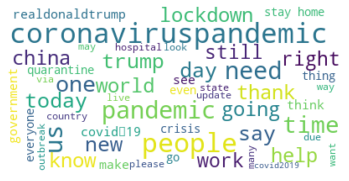

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(words)
text = text.lower()
stopwords = set(STOPWORDS)
stopwords.update(["https",'amp','corona','covid','covid19','covid_19','covid[]]19','coronvirus','coronavirusupdate',"coronavirus", "coronavirusoutbreak", "virus", "coronaalert", 'co'])
stopwords.update(stopWords)
stopwords.update(Extra_StopWords)
wordcloud = WordCloud(max_words=50,background_color="white",stopwords=stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sentiment Analysis

In [0]:
from textblob import TextBlob

In [0]:
#creating a list of tweets from the series to make looping easier
tweet_list = []

for atweet in small_tweets['text']:
  tweet_list.append(atweet)


In [0]:
#an empty list to hold sentiment scores
sentimentscores = []

# enumerate gives us the index and content of an item we loop over
for i, atweet in enumerate(tweet_list):

  text = tweet_list[i]
  textannotation = TextBlob(text)
  sentimentscore = textannotation.sentiment.polarity
  
  sentimentscores.append(sentimentscore)

print(len(sentimentscores))

    

81793


 "The polarity score is a float within the range [-1.0, 1.0]"  

Closer to 1: positive  
Closer to 0: neutral  
Closer to -1: negative

In [0]:
#make sure the loop did what I wanted it to
sentimentscores[0:9]

[0.04999999999999999,
 0.10625,
 0.07500000000000001,
 0.0,
 0.425,
 -0.13333333333333333,
 0.0,
 -0.3,
 0.26666666666666666]

In [0]:
#making sure the lengths are equal before adding a new column of sentiment scores
print(len(sentimentscores))
print(len(small_tweets['text']))

81793
81793


In [0]:
small_tweets['sentiment'] = sentimentscores
small_tweets.head()

,date,screen_name,text,source,favourites_count,retweet_count,followers_count,verified,sentiment
0,2020-03-26,AnnaKealan,hoping for more contagious #love after this st...,Twitter for iPhone,0.0,0.0,10.0,0.0,0.05000
1,2020-03-12,DrPaulRLong1,Is Trump even consulting with his experts? The...,Twitter for iPhone,51.0,1.0,6.0,0.0,0.10625
2,2020-03-21,Sakthi_match,#coronavirus #Covid_19 #workingfromhome #WorkF...,Twitter for iPhone,41.0,0.0,61.0,0.0,0.07500
3,2020-03-25,Agarwal_b_mohit,Reason for Corona Outbreak #coronovirusoutbrea...,Instagram,1.0,0.0,11.0,0.0,0.00000
4,2020-03-18,DavidKatee,During this period of #Covid_19 you will to kn...,Twitter for iPhone,10345.0,1.0,989.0,0.0,0.42500


Now we can plot sentiment over time

### Topic Modeling

In [0]:
!pip install tmtoolkit

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
import random
random.seed(20191122)

import pandas as pd
import numpy as np
np.set_printoptions(precision = 5)

from tmtoolkit.corpus import Corpus
import codecs

In [0]:
#list to string
word_counts1 = ' '.join(map(str, word_counts))

In [0]:
corpus = Corpus()
text = 3

for i, tweet in enumerate(word_counts1):
  corpus.add_doc(str(i), tweet)

In [0]:
print(len(corpus))
corpus['10']

5266387


'7'

In [0]:
#this will take a while to run

from tmtoolkit.preprocess import TMPreproc

#create a new structure for data processing (from our corpus)
preproc = TMPreproc(corpus)
#tags the part of speech for each word
#certain parts of speech are going to be more informative than others in topic modeling
preproc.pos_tag()
#lemmatized text is used to standardize (to the root of the word) (plural, tenses)
#stemming is a similar solution here
preproc.lemmatize()

#lowercase everything to make processing easier
preproc.tokens_to_lowercase()

#removes any special characters 
preproc.remove_special_chars_in_tokens()

#removes common phrases, etc that we don't want showing up in our topics 
# preproc.add_stopwords(['http', 'nt', 'corona','virus','coronavirus','covid','covid-19','covid19','disease','death','quarantine'])
preproc.add_stopwords(['people', 'death'])

In [0]:
# we want this to be fairly small, so more preprocessing.
preproc.vocabulary_size

In [0]:
# filters for nouns only, which are probably going to be more informative for us
preproc.filter_for_pos('N','V')

In [0]:
# cleans a little further, removes numbers and any words 2 characters or shorter
preproc.clean_tokens(remove_numbers =True, remove_shorter_than = 3)

In [0]:
#remove super common words (something that shows up in many tweets)
#these words probably have a super generic use, or are super common across tweets
#the higher the threshold, the fewer tokens that will be included 
preproc.remove_common_tokens(df_threshold=1)

In [0]:
preproc.vocabulary_size

0

In [0]:
preproc.tokens['10']

[]

In [0]:
preproc_smaller = preproc.copy()
preproc_smaller.filter_for_pos('N')# built filer only looking at Noun
preproc_smaller.clean_tokens(remove_numbers=True, remove_shorter_than=2)
preproc_smaller.remove_common_tokens(df_threshold=1)#remove commen words
#preproc_smaller.remove_uncommon_tokens(df_threshold=0.005)

KeyboardInterrupt: ignored

In [0]:
#compare each cleansing, smaller is better. So we used smaller for the following analysis
print(preproc.tokens['100'])
print(preproc_smaller.tokens['100'])
print(preproc.tokens['1'])
print(preproc_smaller.tokens['1'])
print(preproc.tokens['2000'])
print(preproc_smaller.tokens['2000'])

In [0]:
print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

In [0]:
import numpy as np

In [0]:
doc_labels = np.array(preproc.doc_labels)

In [0]:
vocab = np.array(preproc.vocabulary)

In [0]:
dtm = preproc.dtm


In [0]:
!pip install tmtoolkit['lda']
import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel

# suppress the "INFO" messages and warnings from lda
logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False

warnings.filterwarnings('ignore')

# set data to use 
dtms = {
    'data': dtm
}

# and fixed hyperparameters
lda_params = {
     # always starts with a complete guess, this can be tweaked later
    'n_topics': 10,
    #beta parameter: a way to think of the granularity on a topic
    #the higher, the less granular, the lower, the more.
    #if topics are too vague, lower beta param.
    'eta': .0001, 
    'n_iter': 1000,
    'random_state': 20191122 # to make results reporducable 
}

models = compute_models_parallel(dtms, constant_parameters = lda_params)

In [0]:
models.head()

NameError: ignored

In [0]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

# pulling the smaller set of topics out of the models dictionary
# then pulling out the words
model_sm = models['smaller'][0][1]

# printing the model
print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm, top_n = 5)

IndexError: ignored

### Trying to use spark 



ModuleNotFoundError: ignored